# Steam Games Analysis
## Analyzing the highest selling and most popular games on Steam

In [57]:
# Import packages

import numpy as np # Linear algebra
import pandas as pd # Data cleaning and manipulation
import matplotlib.pyplot as plt # Data visulaization (graphs, plots, etc.)
import seaborn as sns # Enhanced data visualization

In [65]:
# Reading in the data
sd = pd.read_csv('Steam Games.csv', low_memory=False)
sd

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,0,0,3.99,0,'Ashes of war' is an anti war theme adventure ...,['Simplified Chinese'],['Simplified Chinese'],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,13639516830@163.com,True,False,False,0,NaN,0,5,7,NaN,44,0,NaN,0,0,0,0,宁夏华夏西部影视城有限公司,宁夏华夏西部影视城有限公司,"Single-player,Family Sharing","Adventure,Casual,Indie,RPG","Sokoban,RPG,Puzzle-Platformer,Exploration,Adve...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0,0,0.00,0,NYCTOPHILIA Nyctophilia is an 2D psychological...,"['English', 'Russian']","['English', 'Russian']",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,catinjar42@gmail.com,True,False,False,0,NaN,0,196,106,NaN,0,0,NaN,0,0,0,0,Cat In A Jar Games,Cat In A Jar Games,Single-player,"Adventure,Free To Play,Indie","Free to Play,Indie,Adventure,Horror,2D,Pixel G...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,0,0,19.99,0,"ABOUT Now nothing more than a phantom, can the...","['English', 'Simplified Chinese', 'Traditional...",['Japanese'],73 – metacritic,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,info@qureate.net,True,False,False,0,NaN,0,264,46,NaN,21,299,This Game may contain content not appropriate ...,0,0,0,0,qureate,qureate,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Sexual Content,Adventure,Indie,Nudity,Anime,Ma...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,0,0,7.99,0,Is a hardcore action with a non-trivial level ...,"['English', 'Russian']",[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,deadintimegame@gmail.com,True,False,False,0,NaN,0,7,3,NaN,6,0,NaN,0,0,0,0,Zelenov Artem,Zelenov Artem,"Single-player,Full controller support,Family S...","Action,Indie","Action,Indie,Souls-like,Fantasy,Early Access,R...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,2,0,3.99,0,Panacle: Back to the Wild is a indie card game...,"['English', 'Japanese', 'Simplified Chinese', ...","['Simplified Chinese', 'Traditional Chinese']",NaN,https://shared.akamai.steamstatic.com/store_it...,https://space.bilibili.com/9283519,https://space.bilibili.com/9283519,2825411077@qq.com,True,False,False,0,NaN,0,10,5,NaN,0,0,NaN,0,0,0,0,渡鸦游戏,"渡鸦游戏,电钮组","Single-player,Family Sharing","Indie,Strategy,Early Access","Trading Card Game,Turn-Based Strategy,Lore-Ric...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93177,2251030,Mutant Monty (C64/CPC/Spectrum),"Jan 5, 2023",NaN,0,0,4.99,0,Originally released in 1984 for home microcomp...,['English'],[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,info@pixelgames.uk,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Artic Computing,Pixel Games UK,"Single-player,Partial Controller Support,Steam...",Action,NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
93178,1330890,Crystal Caves HD,"Oct 15, 2020",NaN,0,0,7.99,0,The best mine

In [23]:
sd.head(10)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,0,0,3.99,0,'Ashes of war' is an anti war theme adventure ...,['Simplified Chinese'],['Simplified Chinese'],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,13639516830@163.com,True,False,False,0,NaN,0,5,7,NaN,44,0,NaN,0,0,0,0,宁夏华夏西部影视城有限公司,宁夏华夏西部影视城有限公司,"Single-player,Family Sharing","Adventure,Casual,Indie,RPG","Sokoban,RPG,Puzzle-Platformer,Exploration,Adve...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0,0,0.00,0,NYCTOPHILIA Nyctophilia is an 2D psychological...,"['English', 'Russian']","['English', 'Russian']",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,catinjar42@gmail.com,True,False,False,0,NaN,0,196,106,NaN,0,0,NaN,0,0,0,0,Cat In A Jar Games,Cat In A Jar Games,Single-player,"Adventure,Free To Play,Indie","Free to Play,Indie,Adventure,Horror,2D,Pixel G...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,0,0,19.99,0,"ABOUT Now nothing more than a phantom, can the...","['English', 'Simplified Chinese', 'Traditional...",['Japanese'],73 – metacritic,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,info@qureate.net,True,False,False,0,NaN,0,264,46,NaN,21,299,This Game may contain content not appropriate ...,0,0,0,0,qureate,qureate,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Sexual Content,Adventure,Indie,Nudity,Anime,Ma...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,0,0,7.99,0,Is a hardcore action with a non-trivial level ...,"['English', 'Russian']",[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,deadintimegame@gmail.com,True,False,False,0,NaN,0,7,3,NaN,6,0,NaN,0,0,0,0,Zelenov Artem,Zelenov Artem,"Single-player,Full controller support,Family S...","Action,Indie","Action,Indie,Souls-like,Fantasy,Early Access,R...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,2,0,3.99,0,Panacle: Back to the Wild is a indie card game...,"['English', 'Japanese', 'Simplified Chinese', ...","['Simplified Chinese', 'Traditional Chinese']",NaN,https://shared.akamai.steamstatic.com/store_it...,https://space.bilibili.com/9283519,https://space.bilibili.com/9283519,2825411077@qq.com,True,False,False,0,NaN,0,10,5,NaN,0,0,NaN,0,0,0,0,渡鸦游戏,"渡鸦游戏,电钮组","Single-player,Family Sharing","Indie,Strategy,Early Access","Trading Card Game,Turn-Based Strategy,Lore-Ric...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
5,431510,Mystic Destinies: Serendipity of Aeons,"Feb 11, 2016",100000 - 200000,1,0,0.00,11,MDSOA is now 100% complete! You can purchase t...,['English'],[],“I highly recommend trying this. It’s not with...,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,NaN,True,True,True,0,NaN,0,318,72,NaN,35,0,NaN,0,0,0,0,Aeon Dream Studios,Aeon Dream Studios,"Single-player,Steam Achievements,Steam Trading...","Adventure,Casual,Indie,Simulation","Visual Novel,Otome,Female Protagonist,Indie,Fr...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
6,1054250,krAsAvA Shot,"Apr 4, 2019",0 - 20000,0,0,0.99,0,2079 planet Earth. Together with the spacec

In [24]:
sd.tail(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
93177,2251030,Mutant Monty (C64/CPC/Spectrum),"Jan 5, 2023",NaN,0,0,4.99,0,Originally released in 1984 for home microcomp...,['English'],[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,info@pixelgames.uk,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Artic Computing,Pixel Games UK,"Single-player,Partial Controller Support,Steam...",Action,NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
93178,1330890,Crystal Caves HD,"Oct 15, 2020",NaN,0,0,7.99,0,The best miner in the Galaxy is back! Revisit ...,['English'],[],"“Crystal Caves HD is the new best remake ever,...",https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,support@emberheartgames.com,True,False,True,0,NaN,0,0,0,NaN,32,270,NaN,0,0,0,0,Emberheart Games,Apogee Entertainment,"Single-player,Steam Achievements,Full controll...",Action,NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
93179,1844230,Malicious ReloadⅡ,"Sep 5, 2023",NaN,0,0,5.99,0,★ To ensure that the game you have purchased w...,"['Japanese', 'English', 'Simplified Chinese', ...","['Japanese', 'Thai']",NaN,https://shared.akamai.steamstatic.com/store_it...,https://playmeow.com/,NaN,support@playmeow.com,True,False,False,0,NaN,0,0,0,NaN,0,0,This Game may contain content not appropriate ...,0,0,0,0,UNDER HILL,Playmeow,"Single-player,Family Sharing","Action,Adventure,Simulation",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
93180,2623690,Mutant Frog,"Jan 27, 2024",NaN,0,0,0.99,0,As a result of an unknown meteorite hitting an...,['English'],['English'],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,www.run-ogames.com,onur_aydogdu@outlook.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Run-O Games,Run-O Games,"Single-player,Family Sharing","Action,Adventure,Casual,Indie",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
93181,2313950,CRAZY GUY,"Mar 20, 2023",NaN,0,0,9.99,0,CRAZY GUY is the story of a space tramp who tr...,"['English', 'Russian']","['English', 'Russian']",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,enoopsgames@gmail.com,True,False,False,0,NaN,0,0,0,NaN,21,0,NaN,0,0,0,0,NIK Studios,NIK Studios,"Single-player,Steam Achievements,Family Sharing","Action,Adventure,Casual",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


In [25]:
sd.info

<bound method DataFrame.info of          AppID                             Name  Release date  \
0      1424640                               余烬   Oct 3, 2020   
1       402890                      Nyctophilia  Sep 23, 2015   
2      1151740                  Prison Princess   Apr 2, 2020   
3       875530                     Dead In Time  Oct 12, 2018   
4      1835360            Panacle: Back To Wild  Mar 11, 2022   
...        ...                              ...           ...   
93177  2251030  Mutant Monty (C64/CPC/Spectrum)   Jan 5, 2023   
93178  1330890                 Crystal Caves HD  Oct 15, 2020   
93179  1844230                Malicious ReloadⅡ   Sep 5, 2023   
93180  2623690                      Mutant Frog  Jan 27, 2024   
93181  2313950                        CRAZY GUY  Mar 20, 2023   

      Estimated owners  Peak CCU  Required age  Price  DLC count  \
0        20000 - 50000         0             0   3.99          0   
1       50000 - 100000         0             0   0.

In [26]:
sd.shape

(93182, 39)

In [27]:
sd.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendati

In [28]:
sd.isnull()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93177,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False
93178,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False
93179,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
93180,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False


In [29]:
sd.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,0,0,3.99,0,'Ashes of war' is an anti war theme adventure ...,['Simplified Chinese'],['Simplified Chinese'],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,13639516830@163.com,True,False,False,0,NaN,0,5,7,NaN,44,0,NaN,0,0,0,0,宁夏华夏西部影视城有限公司,宁夏华夏西部影视城有限公司,"Single-player,Family Sharing","Adventure,Casual,Indie,RPG","Sokoban,RPG,Puzzle-Platformer,Exploration,Adve...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0,0,0.00,0,NYCTOPHILIA Nyctophilia is an 2D psychological...,"['English', 'Russian']","['English', 'Russian']",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,catinjar42@gmail.com,True,False,False,0,NaN,0,196,106,NaN,0,0,NaN,0,0,0,0,Cat In A Jar Games,Cat In A Jar Games,Single-player,"Adventure,Free To Play,Indie","Free to Play,Indie,Adventure,Horror,2D,Pixel G...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,0,0,19.99,0,"ABOUT Now nothing more than a phantom, can the...","['English', 'Simplified Chinese', 'Traditional...",['Japanese'],73 – metacritic,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,info@qureate.net,True,False,False,0,NaN,0,264,46,NaN,21,299,This Game may contain content not appropriate ...,0,0,0,0,qureate,qureate,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Sexual Content,Adventure,Indie,Nudity,Anime,Ma...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,0,0,7.99,0,Is a hardcore action with a non-trivial level ...,"['English', 'Russian']",[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,deadintimegame@gmail.com,True,False,False,0,NaN,0,7,3,NaN,6,0,NaN,0,0,0,0,Zelenov Artem,Zelenov Artem,"Single-player,Full controller support,Family S...","Action,Indie","Action,Indie,Souls-like,Fantasy,Early Access,R...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,2,0,3.99,0,Panacle: Back to the Wild is a indie card game...,"['English', 'Japanese', 'Simplified Chinese', ...","['Simplified Chinese', 'Traditional Chinese']",NaN,https://shared.akamai.steamstatic.com/store_it...,https://space.bilibili.com/9283519,https://space.bilibili.com/9283519,2825411077@qq.com,True,False,False,0,NaN,0,10,5,NaN,0,0,NaN,0,0,0,0,渡鸦游戏,"渡鸦游戏,电钮组","Single-player,Family Sharing","Indie,Strategy,Early Access","Trading Card Game,Turn-Based Strategy,Lore-Ric...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


# Cleaning the data

In [30]:
# Dropping unneeded colums from the dataset

sd2 = sd.drop(['Peak CCU','Required age','DLC count','About the game', 'Supported languages','Average playtime two weeks',
                'Median playtime forever', 'Median playtime two weeks','Developers','Categories','Tags', 'Screenshots', 'Movies'], axis='columns')
sd2.head()

,AppID,Name,Release date,Estimated owners,Price,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Publishers,Genres
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,3.99,['Simplified Chinese'],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,13639516830@163.com,True,False,False,0,NaN,0,5,7,NaN,44,0,NaN,0,宁夏华夏西部影视城有限公司,"Adventure,Casual,Indie,RPG"
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0.00,"['English', 'Russian']",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,catinjar42@gmail.com,True,False,False,0,NaN,0,196,106,NaN,0,0,NaN,0,Cat In A Jar Games,"Adventure,Free To Play,Indie"
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,19.99,['Japanese'],73 – metacritic,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,info@qureate.net,True,False,False,0,NaN,0,264,46,NaN,21,299,This Game may contain content not appropriate ...,0,qureate,"Adventure,Indie"
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,7.99,[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,deadintimegame@gmail.com,True,False,False,0,NaN,0,7,3,NaN,6,0,NaN,0,Zelenov Artem,"Action,Indie"
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,3.99,"['Simplified Chinese', 'Traditional Chinese']",NaN,https://shared.akamai.steamstatic.com/store_it...,https://space.bilibili.com/9283519,https://space.bilibili.com/9283519,2825411077@qq.com,True,False,False,0,NaN,0,10,5,NaN,0,0,NaN,0,"渡鸦游戏,电钮组","Indie,Strategy,Early Access"


In [31]:
# Displaying all remaining columns
pd.set_option('display.max_columns', None)
sd2

,AppID,Name,Release date,Estimated owners,Price,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Publishers,Genres
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,3.99,['Simplified Chinese'],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,13639516830@163.com,True,False,False,0,NaN,0,5,7,NaN,44,0,NaN,0,宁夏华夏西部影视城有限公司,"Adventure,Casual,Indie,RPG"
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0.00,"['English', 'Russian']",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,catinjar42@gmail.com,True,False,False,0,NaN,0,196,106,NaN,0,0,NaN,0,Cat In A Jar Games,"Adventure,Free To Play,Indie"
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,19.99,['Japanese'],73 – metacritic,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,info@qureate.net,True,False,False,0,NaN,0,264,46,NaN,21,299,This Game may contain content not appropriate ...,0,qureate,"Adventure,Indie"
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,7.99,[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,deadintimegame@gmail.com,True,False,False,0,NaN,0,7,3,NaN,6,0,NaN,0,Zelenov Artem,"Action,Indie"
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,3.99,"['Simplified Chinese', 'Traditional Chinese']",NaN,https://shared.akamai.steamstatic.com/store_it...,https://space.bilibili.com/9283519,https://space.bilibili.com/9283519,2825411077@qq.com,True,False,False,0,NaN,0,10,5,NaN,0,0,NaN,0,"渡鸦游戏,电钮组","Indie,Strategy,Early Access"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93177,2251030,Mutant Monty (C64/CPC/Spectrum),"Jan 5, 2023",NaN,4.99,[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,info@pixelgames.uk,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,Pixel Games UK,Action
93178,1330890,Crystal Caves HD,"Oct 15, 2020",NaN,7.99,[],"“Crystal Caves HD is the new best remake ever,...",https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,support@emberheartgames.com,True,False,True,0,NaN,0,0,0,NaN,32,270,NaN,0,Apogee Entertainment,Action
93179,1844230,Malicious ReloadⅡ,"Sep 5, 2023",NaN,5.99,"['Japanese', 'Thai']",NaN,https://shared.akamai.steamstatic.com/store_it...,https://playmeow.com/,NaN,support@playmeow.com,True,False,False,0,NaN,0,0,0,NaN,0,0,This Game may contain content not appropriate ...,0,Playmeow,"Action,Adventure,Simulation"
93180,2623690,Mutant Frog,"Jan 27, 2024",NaN,0.99,['English'],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,www.run-ogames.com,onur_aydogdu@outlook.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,Run-O Games,"Action,Adventure,Casual,Indie"


In [32]:
sd2.head(5)

,AppID,Name,Release date,Estimated owners,Price,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Publishers,Genres
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,3.99,['Simplified Chinese'],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,13639516830@163.com,True,False,False,0,NaN,0,5,7,NaN,44,0,NaN,0,宁夏华夏西部影视城有限公司,"Adventure,Casual,Indie,RPG"
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0.00,"['English', 'Russian']",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,catinjar42@gmail.com,True,False,False,0,NaN,0,196,106,NaN,0,0,NaN,0,Cat In A Jar Games,"Adventure,Free To Play,Indie"
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,19.99,['Japanese'],73 – metacritic,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,info@qureate.net,True,False,False,0,NaN,0,264,46,NaN,21,299,This Game may contain content not appropriate ...,0,qureate,"Adventure,Indie"
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,7.99,[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,deadintimegame@gmail.com,True,False,False,0,NaN,0,7,3,NaN,6,0,NaN,0,Zelenov Artem,"Action,Indie"
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,3.99,"['Simplified Chinese', 'Traditional Chinese']",NaN,https://shared.akamai.steamstatic.com/store_it...,https://space.bilibili.com/9283519,https://space.bilibili.com/9283519,2825411077@qq.com,True,False,False,0,NaN,0,10,5,NaN,0,0,NaN,0,"渡鸦游戏,电钮组","Indie,Strategy,Early Access"


In [33]:
# Dropping all remaining unneeded columns
sd3 = sd2.drop(['Full audio languages','Reviews','Header image','Website', 'Support url','Support email',
                'Windows', 'Mac','Linux','Metacritic score','User score', 'Negative', 'Score rank', 
                'Achievements', 'Recommendations', 'Metacritic url', 'Notes', 'Average playtime forever'], axis='columns')
sd3.head(5)

,AppID,Name,Release date,Estimated owners,Price,Positive,Publishers,Genres
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,3.99,5,宁夏华夏西部影视城有限公司,"Adventure,Casual,Indie,RPG"
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0.00,196,Cat In A Jar Games,"Adventure,Free To Play,Indie"
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,19.99,264,qureate,"Adventure,Indie"
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,7.99,7,Zelenov Artem,"Action,Indie"
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,3.99,10,"渡鸦游戏,电钮组","Indie,Strategy,Early Access"


In [34]:
sd3

,AppID,Name,Release date,Estimated owners,Price,Positive,Publishers,Genres
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,3.99,5,宁夏华夏西部影视城有限公司,"Adventure,Casual,Indie,RPG"
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0.00,196,Cat In A Jar Games,"Adventure,Free To Play,Indie"
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,19.99,264,qureate,"Adventure,Indie"
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,7.99,7,Zelenov Artem,"Action,Indie"
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,3.99,10,"渡鸦游戏,电钮组","Indie,Strategy,Early Access"
...,...,...,...,...,...,...,...,...
93177,2251030,Mutant Monty (C64/CPC/Spectrum),"Jan 5, 2023",NaN,4.99,0,Pixel Games UK,Action
93178,1330890,Crystal Caves HD,"Oct 15, 2020",NaN,7.99,0,Apogee Entertainment,Action
93179,1844230,Malicious ReloadⅡ,"Sep 5, 2023",NaN,5.99,0,Playmeow,"Action,Adventure,Simulation"
93180,2623690,Mutant Frog,"Jan 27, 2024",NaN,0.99,0,Run-O Games,"Action,Adventure,Casual,Indie"


In [35]:
sd3.isnull()

,AppID,Name,Release date,Estimated owners,Price,Positive,Publishers,Genres
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
93177,False,False,False,True,False,False,False,False
93178,False,False,False,True,False,False,False,False
93179,False,False,False,True,False,False,False,False
93180,False,False,False,True,False,False,False,False


In [36]:
# Checking for NULL values in the dataset
sd3.isnull().sum()

AppID                   0
Name                    3
Release date            0
Estimated owners    76720
Price                   0
Positive                0
Publishers           5302
Genres               4801
dtype: int64

In [37]:
# Dropping all NULL values in the dataset
sd4 = sd3.dropna()
sd4.isnull().sum()

AppID               0
Name                0
Release date        0
Estimated owners    0
Price               0
Positive            0
Publishers          0
Genres              0
dtype: int64

In [41]:
sd4.head(10)

,AppID,Name,Release date,Estimated owners,Price,Positive,Publishers,Genres
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,3.99,5,宁夏华夏西部影视城有限公司,"Adventure,Casual,Indie,RPG"
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0.00,196,Cat In A Jar Games,"Adventure,Free To Play,Indie"
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,19.99,264,qureate,"Adventure,Indie"
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,7.99,7,Zelenov Artem,"Action,Indie"
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,3.99,10,"渡鸦游戏,电钮组","Indie,Strategy,Early Access"
5,431510,Mystic Destinies: Serendipity of Aeons,"Feb 11, 2016",100000 - 200000,0.00,318,Aeon Dream Studios,"Adventure,Casual,Indie,Simulation"
6,1054250,krAsAvA Shot,"Apr 4, 2019",0 - 20000,0.99,3,MIGALOO GAMES,"Adventure,Indie"
7,2604580,THE JUSOU 3,"Feb 20, 2024",0 - 20000,9.99,7,株式会社Metaware,"Adventure,Casual,Indie"
8,1154840,Shadow Empire,"Dec 3, 2020",50000 - 100000,39.99,1145,Slitherine Ltd.,"RPG,Simulation,Strategy"
9,496740,Discovering Space 2,"Mar 10, 2017",0 - 20000,9.99,64,Discovering VR,"Casual,Indie,Simulation"


### Creating function to find mean in 'Estimated owners' column

In [42]:
# Finding the averave of Estimated Owners
def convert_estown_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [43]:
# Check to see if mean value worked
convert_estown_to_num('20000 - 50000')

35000.0

In [44]:
# Creating a new dataframe to copy sd4
sd5 = sd4.copy()
sd5['Estimated owners'] = sd5['Estimated owners'].apply(convert_estown_to_num)
sd5.head(3)

,AppID,Name,Release date,Estimated owners,Price,Positive,Publishers,Genres
0,1424640,余烬,"Oct 3, 2020",35000.0,3.99,5,宁夏华夏西部影视城有限公司,"Adventure,Casual,Indie,RPG"
1,402890,Nyctophilia,"Sep 23, 2015",75000.0,0.00,196,Cat In A Jar Games,"Adventure,Free To Play,Indie"
2,1151740,Prison Princess,"Apr 2, 2020",10000.0,19.99,264,qureate,"Adventure,Indie"


In [46]:
sd5.head(10)

,AppID,Name,Release date,Estimated owners,Price,Positive,Publishers,Genres
0,1424640,余烬,"Oct 3, 2020",35000.0,3.99,5,宁夏华夏西部影视城有限公司,"Adventure,Casual,Indie,RPG"
1,402890,Nyctophilia,"Sep 23, 2015",75000.0,0.00,196,Cat In A Jar Games,"Adventure,Free To Play,Indie"
2,1151740,Prison Princess,"Apr 2, 2020",10000.0,19.99,264,qureate,"Adventure,Indie"
3,875530,Dead In Time,"Oct 12, 2018",10000.0,7.99,7,Zelenov Artem,"Action,Indie"
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",10000.0,3.99,10,"渡鸦游戏,电钮组","Indie,Strategy,Early Access"
5,431510,Mystic Destinies: Serendipity of Aeons,"Feb 11, 2016",150000.0,0.00,318,Aeon Dream Studios,"Adventure,Casual,Indie,Simulation"
6,1054250,krAsAvA Shot,"Apr 4, 2019",10000.0,0.99,3,MIGALOO GAMES,"Adventure,Indie"
7,2604580,THE JUSOU 3,"Feb 20, 2024",10000.0,9.99,7,株式会社Metaware,"Adventure,Casual,Indie"
8,1154840,Shadow Empire,"Dec 3, 2020",75000.0,39.99,1145,Slitherine Ltd.,"RPG,Simulation,Strategy"
9,496740,Discovering Space 2,"Mar 10, 2017",10000.0,9.99,64,Discovering VR,"Casual,Indie,Simulation"


# Finding the highest grossing Steam game based on the data

In [49]:
# Creating a new column and finding total sales
sd5['Total Sales'] = sd5['Estimated owners'] * sd5['Price']

In [51]:
# Checking to see if 'Total Sales' was added
sd5.head(10)

,AppID,Name,Release date,Estimated owners,Price,Positive,Publishers,Genres,Total Sales
0,1424640,余烬,"Oct 3, 2020",35000.0,3.99,5,宁夏华夏西部影视城有限公司,"Adventure,Casual,Indie,RPG",139650.0
1,402890,Nyctophilia,"Sep 23, 2015",75000.0,0.00,196,Cat In A Jar Games,"Adventure,Free To Play,Indie",0.0
2,1151740,Prison Princess,"Apr 2, 2020",10000.0,19.99,264,qureate,"Adventure,Indie",199900.0
3,875530,Dead In Time,"Oct 12, 2018",10000.0,7.99,7,Zelenov Artem,"Action,Indie",79900.0
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",10000.0,3.99,10,"渡鸦游戏,电钮组","Indie,Strategy,Early Access",39900.0
5,431510,Mystic Destinies: Serendipity of Aeons,"Feb 11, 2016",150000.0,0.00,318,Aeon Dream Studios,"Adventure,Casual,Indie,Simulation",0.0
6,1054250,krAsAvA Shot,"Apr 4, 2019",10000.0,0.99,3,MIGALOO GAMES,"Adventure,Indie",9900.0
7,2604580,THE JUSOU 3,"Feb 20, 2024",10000.0,9.99,7,株式会社Metaware,"Adventure,Casual,Indie",99900.0
8,1154840,Shadow Empire,"Dec 3, 2020",75000.0,39.99,1145,Slitherine Ltd.,"RPG,Simulation,Strategy",2999250.0
9,496740,Discovering Space 2,"Mar 10, 2017",10000.0,9.99,64,Discovering VR,"Casual,Indie,Simulation",99900.0


In [54]:
# Renaming column from 'Name' to 'Game Title'
sd5.rename(columns={'Name': 'Game Title'}, inplace=True)

In [55]:
# Checking to see if name change was successful
sd5.head(5)

,AppID,Game Title,Release date,Estimated owners,Price,Positive,Publishers,Genres,Total Sales
0,1424640,余烬,"Oct 3, 2020",35000.0,3.99,5,宁夏华夏西部影视城有限公司,"Adventure,Casual,Indie,RPG",139650.0
1,402890,Nyctophilia,"Sep 23, 2015",75000.0,0.00,196,Cat In A Jar Games,"Adventure,Free To Play,Indie",0.0
2,1151740,Prison Princess,"Apr 2, 2020",10000.0,19.99,264,qureate,"Adventure,Indie",199900.0
3,875530,Dead In Time,"Oct 12, 2018",10000.0,7.99,7,Zelenov Artem,"Action,Indie",79900.0
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",10000.0,3.99,10,"渡鸦游戏,电钮组","Indie,Strategy,Early Access",39900.0


# Plotting highest grossing video game

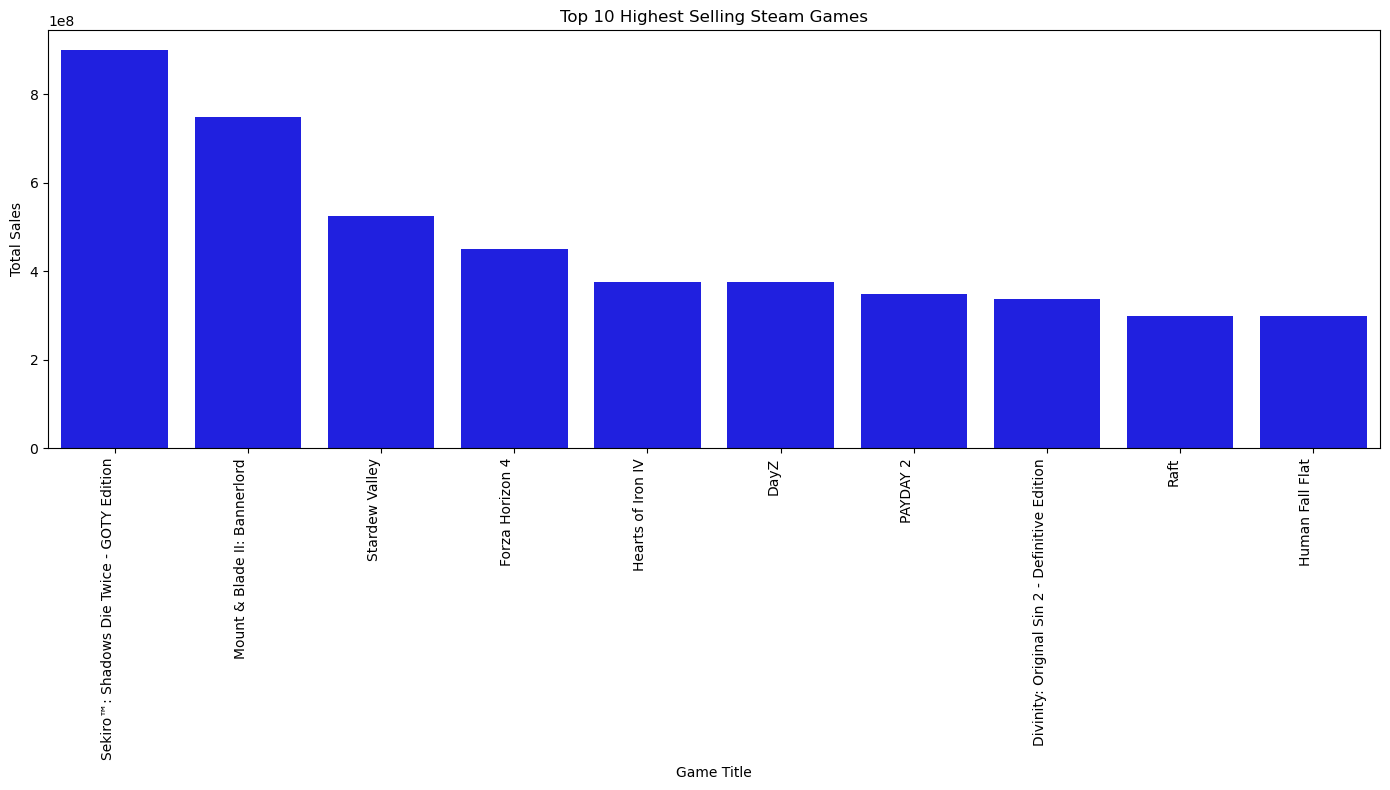

In [64]:
# Plotting the top ten best selling Steam games
top_10 = sd5.sort_values('Total Sales', ascending=False).head(10)

plt.figure(figsize=(14, 8))

a = sns.barplot(x='Game Title', y='Total Sales', data=top_10, alpha=1, color='blue')
a.set_xticks(range(len(top_10)))
a.set_xticklabels(a.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 10 Highest Selling Steam Games')
plt.xlabel('Game Title')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

# Finding the most popular Steam game based on the data

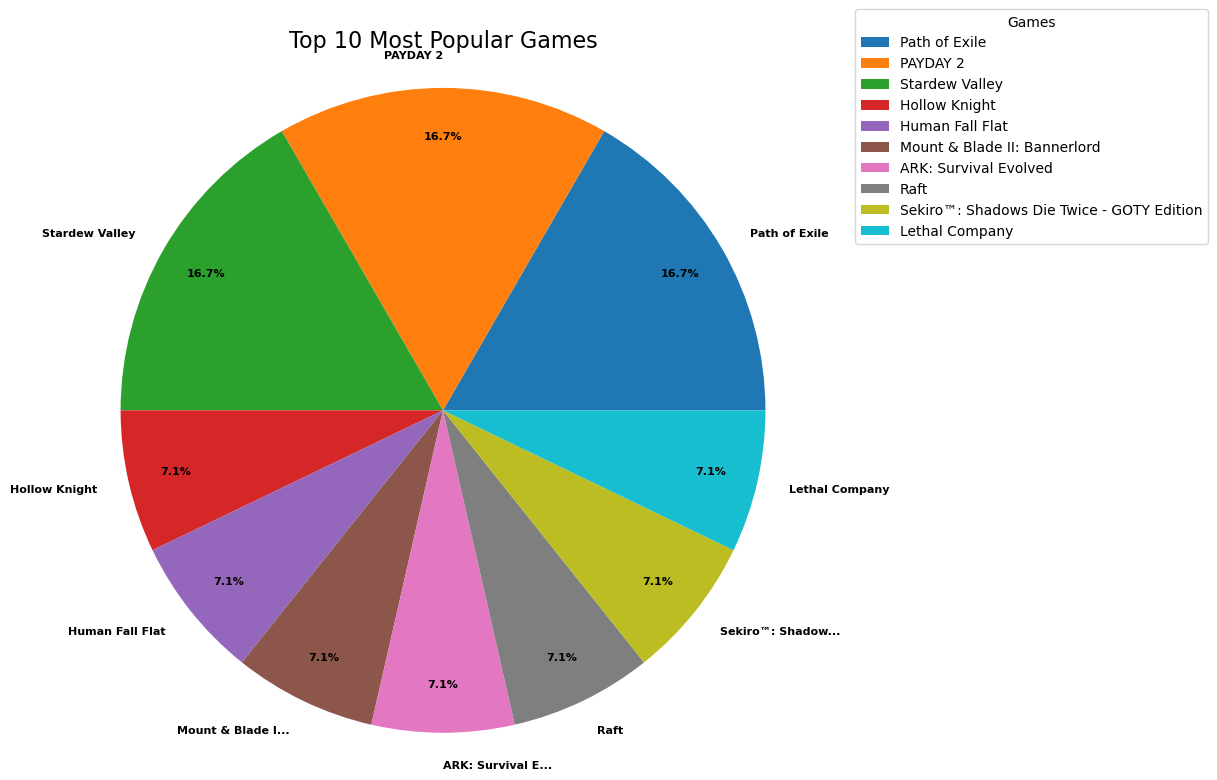

In [88]:
# Setting the limit of 'Estimated owners' to the top 10
top_10 = sd5.sort_values('Estimated owners', ascending=False).head(10)

# Shortened game titles for labels
short_titles = [title[:15] + '...' if len(title) > 15 else title for title in top_10['Game Title']]

# Plotting the data via a pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(top_10['Estimated owners'], 
                                   labels=short_titles, 
                                   autopct='%1.1f%%',
                                   pctdistance=0.85)

# Moving labels outside the pie for clarity
plt.setp(texts, size=8, weight="bold")
plt.setp(autotexts, size=8, weight="bold")

plt.title('Top 10 Most Popular Games', fontsize=16)
plt.axis('equal')

# Adding a legend for added detail
plt.legend(wedges, top_10['Game Title'], 
           title="Games",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1.8))

plt.tight_layout()
plt.show()
